# Assignment - 2(Team Spark)

## Time - Stamp

In [1]:
import datetime
print(datetime.datetime.now())

2020-02-10 19:04:39.065080


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import scipy
import pandas_profiling
import sklearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
import warnings

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score

%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6

sns.set(style="darkgrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading Data

In [3]:
data = pd.read_excel ('Bankruptcy_data_Final.xlsx')

In [4]:
data.head(90)
data.shape

,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1991,2.55,-0.01,-0.16,-0.58,-0.01,0.26,0.00,NaN,-0.02,55.17,40.269841,0.000000,0.000000,0
86,1992,88.40,-0.02,-6.95,-22.80,-0.36,-1.14,0.00,NaN,-0.01,-48.88,-0.974423,0.000000,0.000000,0
87,1993,2.99,-0.05,0.06,-0.42,-0.03,1.48,0.86,-0.04,-0.02,42.93,59.503759,0.000000,0.000000,0
88,1994,2.15,0.05,0.07,-0.42,0.12,0.71,1.43,0.09,0.03,22.46,-0.101404,0.493636,-0.061224,0


(92872, 15)

## Data Profiling

In [5]:
#data_profile = pandas_profiling.ProfileReport(data)
#data_profile.to_file(output_file="profile_report.html")
#data_profile

## Finding duplicates and removing these rows

In [6]:
data.duplicated().sum()
data.loc[data.duplicated(keep=False),:]


27

,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
7511,1985,1.04,1.38,0.02,0.06,0.10,1.10,0.40,0.26,0.07,46.97,NaN,NaN,NaN,0
20837,1985,1.03,3.90,-0.03,0.09,0.11,1.10,0.28,0.39,0.14,83.76,NaN,NaN,NaN,0
20840,1988,1.09,4.41,-0.04,0.10,0.11,1.18,0.29,0.36,0.12,99.79,0.045881,0.059914,-0.001788,0
20841,1989,1.14,4.69,-0.02,0.11,0.11,1.11,0.31,0.35,0.11,114.01,0.009877,0.064385,-0.016834,0
20844,1992,1.22,2.28,0.00,0.12,0.10,1.04,0.33,0.29,0.08,265.59,0.032411,0.072050,-0.011426,0
21789,1985,1.04,4.13,-0.04,0.12,0.09,0.77,0.42,0.20,0.13,148.42,NaN,NaN,NaN,0
24388,1985,1.09,3.57,0.02,0.16,0.13,0.91,0.39,0.33,0.13,274.43,NaN,NaN,NaN,0
26864,1985,1.03,-3.02,-0.08,0.09,-0.04,1.03,0.97,-0.04,-0.14,9.86,NaN,NaN,NaN,0
26865,1986,1.10,2.67,-0.07,0.10,0.11,0.90,0.76,0.14,0.10,12.19,-0.060779,-0.268154,-0.344557,0
26866,1987,1.08,3.16,-0.04,0.11,0.10,0.77,0.71,0.14,0.12,11.92,0.018161,-0.053691,1.315766,0


In [7]:
data = data.drop_duplicates(keep = 'first')
data.head()
data.shape

,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


(92845, 15)

## Handling Missing Values

In [8]:
print (data.isnull().sum())

Data_Year_Fiscal         0
Tobins_Q               252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage_Ratio          26
Asset_Turnover         247
Operational_Margin    5557
Return_on_Equity         8
Market_Book_Ratio       57
Assets_Growth         6693
Sales_Growth          6693
Employee_Growth       7002
BK                       0
dtype: int64


In [9]:
grouped_data = data.groupby(['Data_Year_Fiscal','BK']).median()
#grouped_data['Data_Year_Fiscal'] = grouped_data.index - 1

In [10]:
grouped_data = grouped_data.rename(columns= {'Tobins_Q': 'Tobins_Q_1', 'EPS':'EPS_1',
       'Liquidity':'Liquidity_1','Profitability':'Profitability_1','Return_on_Equity':'Return_on_Equity_1',
        'Productivity':'Productivity_1','Leverage_Ratio':'Leverage_Ratio_1',
        'Market_Book_Ratio': 'Market_Book_Ratio_1','Assets_Growth':'Assets_Growth_1','Sales_Growth':'Sales_Growth_1',
        'Employee_Growth':'Employee_Growth_1', 'Asset_Turnover':'Asset_Turnover_1','Operational_Margin':'Operational_Margin_1'})
grouped_data.head(75)
grouped_data.shape

Tobins_Q_1      EPS_1  Liquidity_1  Profitability_1  \
Data_Year_Fiscal BK                                                        
1979             0     1.080000   1.206828     0.300000         0.260000   
1980             0     1.160000   1.650000     0.270000         0.300000   
                 1     1.097042  -6.248993     0.276542         0.050406   
1981             0     1.160000   1.335534     0.270000         0.280000   
                 1     1.577663  -0.918314     0.001933        -0.154859   
...                         ...        ...          ...              ...   
2014             1     1.925551  -0.440186    -0.377535        -1.397893   
2015             0     1.600000   0.000000     0.150000        -0.110000   
                 1     1.573596 -26.000004    -0.059992        -2.247404   
2016             0     1.670000   0.010000     0.150000        -0.100000   
2017             0     1.730000   0.090000     0.150000        -0.080000   

                     Productivity_1  Leverage_Ratio_1  Asset_Turnover_1  \
Data_Year_Fiscal BK                                                       
1979             0         0.120000          0.600000          1.560000   
1980             0         0.120000          0.485875          1.430000   
                 1        -0.303275         -5.489595          2.195984   
1981             0         0.101951          0.440000          1.370000   
                 1        -0.083013          0.437763          0.955630   
...                             ...               ...               ...   
2014             1        -0.147237         -1.769850          0.899057   
2015             0         0.030000          0.230000          0.590000   
                 1        -0.173649         -0.493578          0.624751   
2016             0         0.030000          0.260000          0.600000   
2017             0         0.040000          0.290000          0.600000   

                     Operational_Margin_1  Return_on_Equity_1  \
Data_Year_Fiscal BK                                             
1979             0               0.070000            0.100000   
1980             0               0.080000            0.090000   
                 1              -0.188040           -2.325068   
1981             0               0.080000            0.093456   
                 1              -0.091367           -0.550034   
...                                   ...                 ...   
2014             1              -0.355874           -0.818036   
2015             0               0.050000            0.000000   
                 1              -0.277950        -2363.636772   
2016             0               0.050000            0.000000   
2017             0               0.060000            0.010000   

                     Market_Book_Ratio_1  Assets_Growth_1  Sales_Growth_1  \
Data_Year_Fiscal BK                                                         
1979             0              5.080000              NaN             NaN   
1980             0              8.793975         0.125877        0.135689   
                 1             -1.311588        -0.217552       -0.116836   
1981             0              7.845123         0.098569        0.105124   
                 1              3.012295        -0.034708       -0.016386   
...                                  ...              ...             ...   
2014             1            -19.673125        -0.084615        0.630486   
2015             0             84.265000         0.002738        0.000000   
                 1                   NaN        -0.557942       -0.308372   
2016             0            101.540000         0.011554        0.000176   
2017             0            116.980000         0.047575        0.059350   

                     Employee_Growth_1  
Data_Year_Fiscal BK                     
1979             0                 NaN  
1980             0            0.016528  
                 1           -0.235955  
198

(75, 13)

In [11]:
merged_left = pd.merge(left= data, right= grouped_data, how='left', left_on= ['Data_Year_Fiscal','BK'],
                                                                right_on= ['Data_Year_Fiscal','BK'])
merged_left.head(90)
merged_left.shape

,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,...,Profitability_1,Productivity_1,Leverage_Ratio_1,Asset_Turnover_1,Operational_Margin_1,Return_on_Equity_1,Market_Book_Ratio_1,Assets_Growth_1,Sales_Growth_1,Employee_Growth_1
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,...,0.260000,0.120000,0.600000,1.56,0.07,0.100000,5.080000,NaN,NaN,NaN
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,...,0.300000,0.120000,0.485875,1.43,0.08,0.090000,8.793975,0.125877,0.135689,0.016528
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,...,0.280000,0.101951,0.440000,1.37,0.08,0.093456,7.845123,0.098569,0.105124,0.002637
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,...,0.280000,0.090000,0.430000,1.26,0.07,0.065406,9.277820,0.049786,0.029189,-0.025471
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,...,0.264034,0.090000,0.350839,1.18,0.07,0.060000,14.109147,0.096201,0.077603,0.028844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1991,2.55,-0.01,-0.16,-0.58,-0.01,0.26,0.00,NaN,-0.02,...,0.190000,0.080000,0.450000,1.11,0.07,0.040000,27.080000,0.037008,0.032221,0.000000
86,1992,88.40,-0.02,-6.95,-22.80,-0.36,-1.14,0.00,NaN,-0.01,...,0.166438,0.080000,0.410000,1.09,0.07,0.040000,34.500000,0.049628,0.062425,0.012386
87,1993,2.99,-0.05,0.06,-0.42,-0.03,1.48,0.86,-0.04,-0.02,...,0.150000,0.080000,0.350000,1.06,0.07,0.040000,40.230000,0.080456,0.080890,0.021739
88,1994,2.15,0.05,0.07,-0.42,0.12,0.71,1.43,0.09,0.03,...,0.150000,0.080000,0.350000,1.05,0.08,0.050000,34.220000,0.092933,0.118042,0.047126


(92845, 28)

In [12]:
merged_left['Tobins_Q'].fillna(merged_left.Tobins_Q_1, inplace=True)
merged_left['EPS'].fillna(merged_left.EPS_1, inplace=True)
merged_left['Liquidity'].fillna(merged_left.Liquidity_1, inplace=True)
merged_left['Profitability'].fillna(merged_left.Profitability_1, inplace=True)
merged_left['Productivity'].fillna(merged_left.Productivity_1, inplace=True)
merged_left['Leverage_Ratio'].fillna(merged_left.Leverage_Ratio_1, inplace=True)
merged_left['Asset_Turnover'].fillna(merged_left.Asset_Turnover_1, inplace=True)
merged_left['Operational_Margin'].fillna(merged_left.Operational_Margin_1, inplace=True)
merged_left['Return_on_Equity'].fillna(merged_left.Return_on_Equity_1, inplace=True)
merged_left['Market_Book_Ratio'].fillna(merged_left.Market_Book_Ratio_1, inplace=True)
merged_left['Assets_Growth'].fillna(merged_left.Assets_Growth_1, inplace=True)
merged_left['Sales_Growth'].fillna(merged_left.Sales_Growth_1, inplace=True)
merged_left['Employee_Growth'].fillna(merged_left.Employee_Growth_1, inplace=True)


In [13]:
print (merged_left.isnull().sum())
merged_left.BK.value_counts()

Data_Year_Fiscal          0
Tobins_Q                  0
EPS                       0
Liquidity                 0
Profitability             0
Productivity              0
Leverage_Ratio            0
Asset_Turnover            0
Operational_Margin        0
Return_on_Equity          0
Market_Book_Ratio         1
Assets_Growth           131
Sales_Growth            131
Employee_Growth         134
BK                        0
Tobins_Q_1                0
EPS_1                     0
Liquidity_1               0
Profitability_1           0
Productivity_1            0
Leverage_Ratio_1          0
Asset_Turnover_1          0
Operational_Margin_1      0
Return_on_Equity_1        0
Market_Book_Ratio_1       1
Assets_Growth_1         131
Sales_Growth_1          131
Employee_Growth_1       134
dtype: int64


0    92287
1      558
Name: BK, dtype: int64

In [14]:
merged_left[(merged_left['Operational_Margin'].isnull()) | (merged_left['Market_Book_Ratio'].isnull()) |
          (merged_left['Assets_Growth'].isnull()) | (merged_left['Sales_Growth'].isnull()) |
           (merged_left['Employee_Growth'].isnull())]

,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,...,Profitability_1,Productivity_1,Leverage_Ratio_1,Asset_Turnover_1,Operational_Margin_1,Return_on_Equity_1,Market_Book_Ratio_1,Assets_Growth_1,Sales_Growth_1,Employee_Growth_1
0,1979,0.980000,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
334,1979,1.860000,0.810000,0.420000,0.150000,0.200000,0.820000,1.460000,0.140000,0.070000,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
411,1979,1.850000,3.110000,0.210000,0.270000,0.230000,0.230000,1.370000,0.170000,0.100000,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
849,1979,2.150000,0.940000,0.340000,0.400000,0.240000,0.360000,1.450000,0.160000,0.070000,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
1095,1979,0.990000,1.230000,0.210000,0.310000,0.190000,0.720000,1.440000,0.130000,0.620000,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91111,1979,0.854776,-0.208297,0.338030,0.334163,0.047960,0.715600,2.772246,0.017300,-0.036225,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
91126,1979,1.227797,1.623973,0.098589,-0.406062,-0.048275,4.705299,2.086269,-0.023139,0.683778,...,0.260000,0.120000,0.600000,1.560000,0.070000,0.100000,5.080000,NaN,NaN,NaN
92519,2003,17.021174,-0.022312,-0.234441,-8.622702,-0.199936,0.000000,0.000000,0.038661,-0.015712,...,-4.287304,-0.045113,0.187214,1.418862,0.038661,0.017479,513.986248,0.256351,0.089274,NaN
92640,2003,1.837813,0.154040,0.118514,0.048094,0.109710,0.374429,2.837724,0.038661,0.050671,...,-4.287304,-0.045113,0.187214,1.418862,0.038661,0.017479,513.986248,0.256351,0.089274,NaN


In [15]:
merged_left = merged_left.dropna()
merged_left
merged_left.BK.value_counts()


,Data_Year_Fiscal,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,...,Profitability_1,Productivity_1,Leverage_Ratio_1,Asset_Turnover_1,Operational_Margin_1,Return_on_Equity_1,Market_Book_Ratio_1,Assets_Growth_1,Sales_Growth_1,Employee_Growth_1
1,1980,0.980000,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,...,0.300000,0.120000,0.485875,1.430000,0.080000,0.090000,8.793975,0.125877,0.135689,0.016528
2,1981,0.870000,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,...,0.280000,0.101951,0.440000,1.370000,0.080000,0.093456,7.845123,0.098569,0.105124,0.002637
3,1982,1.130000,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,...,0.280000,0.090000,0.430000,1.260000,0.070000,0.065406,9.277820,0.049786,0.029189,-0.025471
4,1983,1.260000,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,...,0.264034,0.090000,0.350839,1.180000,0.070000,0.060000,14.109147,0.096201,0.077603,0.028844
5,1984,1.170000,1.500000,0.370000,0.160000,0.110000,0.340000,1.410000,0.080000,0.080000,...,0.260000,0.100000,0.390000,1.239813,0.080000,0.070000,12.650000,0.095420,0.136724,0.043168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,2009,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,...,0.020000,0.040000,0.170000,0.730000,0.050000,0.020000,75.450000,0.009309,-0.051238,-0.018692
92841,2010,1.988495,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,...,0.030000,0.060000,0.170000,0.720000,0.070000,0.030000,92.740000,0.062765,0.083185,0.025600
92842,2011,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,...,0.010000,0.050000,0.180000,0.710000,0.070000,0.040000,80.960000,0.052374,0.084726,0.036020
92843,2012,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,...,-0.020000,0.040000,0.190000,0.670000,0.060000,0.020000,86.150000,0.038398,0.025512,0.011861


0    92156
1      555
Name: BK, dtype: int64

In [16]:
data_final = merged_left.drop(['Tobins_Q_1', 'EPS_1', 'Liquidity_1', 'Profitability_1', 'Productivity_1', 'Leverage_Ratio_1',        
'Asset_Turnover_1', 'Operational_Margin_1', 'Return_on_Equity_1', 'Market_Book_Ratio_1', 'Assets_Growth_1', 'Sales_Growth_1',          
'Employee_Growth_1','Data_Year_Fiscal'], axis = 1)

data_final

,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
1,0.980000,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.870000,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,1.130000,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,1.260000,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
5,1.170000,1.500000,0.370000,0.160000,0.110000,0.340000,1.410000,0.080000,0.080000,7.820000,0.132458,0.231681,0.076978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92841,1.988495,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92842,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92843,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


## Cleaned Data with NO Mssing Values

In [17]:
print(data_final.isnull().sum())
data_final.BK.value_counts()

Tobins_Q              0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage_Ratio        0
Asset_Turnover        0
Operational_Margin    0
Return_on_Equity      0
Market_Book_Ratio     0
Assets_Growth         0
Sales_Growth          0
Employee_Growth       0
BK                    0
dtype: int64


0    92156
1      555
Name: BK, dtype: int64

In [18]:
data_final.corr().round(2)

,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
Tobins_Q,1.00,0.00,-0.21,-0.16,-0.19,-0.00,0.00,-0.00,-0.08,-0.02,-0.00,-0.00,-0.00,-0.00
EPS,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.25,0.00,0.00,0.00,0.00,-0.01
Liquidity,-0.21,-0.00,1.00,0.47,0.23,0.00,-0.04,0.00,0.58,0.00,0.00,0.00,0.00,0.00
Profitability,-0.16,-0.00,0.47,1.00,0.43,0.00,-0.04,0.01,0.11,-0.00,0.00,0.00,0.00,0.00
Productivity,-0.19,-0.00,0.23,0.43,1.00,0.00,-0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00
Leverage_Ratio,-0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.03,-0.00,0.00,-0.00,-0.00
Asset_Turnover,0.00,0.00,-0.04,-0.04,-0.02,-0.00,1.00,0.02,-0.01,-0.01,-0.00,0.00,-0.00,0.02
Operational_Margin,-0.00,-0.00,0.00,0.01,0.01,0.00,0.02,1.00,0.00,0.00,-0.00,0.00,0.00,0.00
Return_on_Equity,-0.08,0.25,0.58,0.11,0.00,-0.00,-0.01,0.00,1.00,0.00,0.00,0.00,0.00,-0.01
Market_Book_Ratio,-0.02,0.00,0.00,-0.00,0.01,0.03,-0.01,0.00,0.00,1.00,-0.00,-0.00,0.00,-0.00


In [19]:
# Scaling Variables

y = data_final.BK
X = data_final.drop('BK', axis=1)
#X

scaler = StandardScaler()
features = ['Tobins_Q',
       'Liquidity','Profitability','Return_on_Equity',
        'Productivity','EPS','Leverage_Ratio',
        'Market_Book_Ratio', 'Assets_Growth','Sales_Growth',
        'Employee_Growth', 'Asset_Turnover','Operational_Margin']

X[features]= scaler.fit_transform(X[features])

#X



In [20]:
data_final = pd.concat([X, y], axis=1)
data_final

,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
1,-0.027001,0.007235,0.024588,0.043876,0.037409,-0.000142,0.254448,0.036137,0.006293,-0.013667,-0.015200,-0.010260,-0.020625,0
2,-0.027123,0.006735,0.024259,0.043787,0.036294,-0.001247,0.235531,0.036041,0.006038,-0.013661,-0.011801,-0.008428,0.018235,0
3,-0.026835,0.006917,0.023930,0.043802,0.036294,-0.002156,0.159863,0.036089,0.006067,-0.013557,-0.017269,-0.011037,-0.030671,0
4,-0.026691,0.006935,0.024999,0.043787,0.036294,-0.004525,0.117300,0.036089,0.006038,-0.013426,-0.013699,-0.009486,-0.019677,0
5,-0.026790,0.007276,0.024670,0.043831,0.037130,-0.003972,0.169322,0.036185,0.006152,-0.013459,-0.015114,-0.008990,-0.017908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,-0.026402,0.005916,0.021499,0.042474,0.032477,-4.120714,-0.415157,0.034230,-0.012822,-0.013830,-0.018007,-0.013598,-0.029271,0
92841,-0.025883,0.005771,0.022398,0.041815,0.030686,-0.023205,-0.395422,0.033105,-0.006884,-0.013854,-0.019815,-0.010405,-0.038973,0
92842,-0.027063,0.006587,0.021949,0.043595,0.031765,-0.002373,-0.377289,0.034243,0.004311,0.111806,-0.019339,-0.010461,-0.031363,0
92843,-0.027214,0.006533,0.022068,0.043551,0.034091,-0.003046,-0.404957,0.035825,0.005682,-0.012360,-0.015895,-0.011341,-0.027935,0


## Resampling 
### 1. Random Undersampling

In [21]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [22]:
y = data_final.BK
X = data_final.drop('BK', axis=1)
X

,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth
1,-0.027001,0.007235,0.024588,0.043876,0.037409,-0.000142,0.254448,0.036137,0.006293,-0.013667,-0.015200,-0.010260,-0.020625
2,-0.027123,0.006735,0.024259,0.043787,0.036294,-0.001247,0.235531,0.036041,0.006038,-0.013661,-0.011801,-0.008428,0.018235
3,-0.026835,0.006917,0.023930,0.043802,0.036294,-0.002156,0.159863,0.036089,0.006067,-0.013557,-0.017269,-0.011037,-0.030671
4,-0.026691,0.006935,0.024999,0.043787,0.036294,-0.004525,0.117300,0.036089,0.006038,-0.013426,-0.013699,-0.009486,-0.019677
5,-0.026790,0.007276,0.024670,0.043831,0.037130,-0.003972,0.169322,0.036185,0.006152,-0.013459,-0.015114,-0.008990,-0.017908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,-0.026402,0.005916,0.021499,0.042474,0.032477,-4.120714,-0.415157,0.034230,-0.012822,-0.013830,-0.018007,-0.013598,-0.029271
92841,-0.025883,0.005771,0.022398,0.041815,0.030686,-0.023205,-0.395422,0.033105,-0.006884,-0.013854,-0.019815,-0.010405,-0.038973
92842,-0.027063,0.006587,0.021949,0.043595,0.031765,-0.002373,-0.377289,0.034243,0.004311,0.111806,-0.019339,-0.010461,-0.031363
92843,-0.027214,0.006533,0.022068,0.043551,0.034091,-0.003046,-0.404957,0.035825,0.005682,-0.012360,-0.015895,-0.011341,-0.027935


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 2210 )
X_train.head()
y_train.head()


,Tobins_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth
3019,-0.025837,0.008155,0.021955,0.044112,0.038803,-0.004604,0.987479,0.036041,0.006152,0.048245,-0.017818,-0.009678,-0.018318
5946,-0.021637,0.007331,0.021708,0.044201,0.039918,0.000688,0.084196,0.036618,0.005982,0.446208,-0.017456,-0.010248,-0.025712
23597,-0.026126,0.006398,0.021379,0.041364,0.029045,-0.004841,-0.388728,0.032101,0.005557,-0.009247,0.007181,-0.009422,0.017344
53103,-0.023954,0.006666,0.019569,0.042871,0.039360,-0.034459,-0.199558,0.037242,0.006038,-4.855179,-0.017052,-0.009772,-0.021081
24586,-0.026646,0.007140,0.021462,0.043772,0.035457,-0.001563,-0.284685,0.036281,0.006038,0.387468,-0.016215,-0.010175,-0.023513


3019     0
5946     0
23597    0
53103    0
24586    0
Name: BK, dtype: int64

In [24]:
from collections import Counter
train_dataset = pd.concat([X_train, y_train], axis=1)
bankrupt = train_dataset[train_dataset['BK']==1]
not_bankrupt = train_dataset[train_dataset['BK']==0]

print(bankrupt.shape,not_bankrupt.shape)

(443, 14) (73725, 14)


In [25]:
# Implementing Random Undersampling for Handling Imbalanced 
rus = SMOTE()
X_rus,y_rus=rus.fit_sample(X_train,y_train)

In [26]:
X_rus.shape,y_rus.shape

((147450, 13), (147450,))

## Logistic Regression

### Decision boundaries and plotting

In [27]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


def plot_boundaries(X_train, X_test, y_train, y_test, clf, clf_name, ax, hide_ticks=True):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    X = np.concatenate((X_train, X_test), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02));
    
    
    score = clf.score(X_test, y_test);

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]);
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1];

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8);

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap=cm_bright, edgecolors='k');
    # Plot the testing points -- make testing points very light -- small alpha
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cm_bright, edgecolors='k', alpha=0.2); 
    
    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    if hide_ticks:
        ax.set_xticks(());
        ax.set_yticks(());
    else:
        ax.tick_params(axis='both', which='major', labelsize=18)
        #ax.yticks(fontsize=18);
        
    ax.set_title(clf_name, fontsize=28);
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=35, horizontalalignment='right');
    ax.grid();
    
    


def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

In [28]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(max_iter = 600)
clf_LR.fit(X_rus,y_rus)

LR_predictions = clf_LR.predict(X_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, LR_predictions)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, LR_predictions , target_names= class_names))
print(confusion_matrix(y_test, LR_predictions))

Accuracy = 0.68
              precision    recall  f1-score   support

 Not_Bakrupt       1.00      0.68      0.81     18431
    Bankrupt       0.01      0.62      0.02       112

    accuracy                           0.68     18543
   macro avg       0.50      0.65      0.42     18543
weighted avg       0.99      0.68      0.80     18543

[[12539  5892]
 [   42    70]]


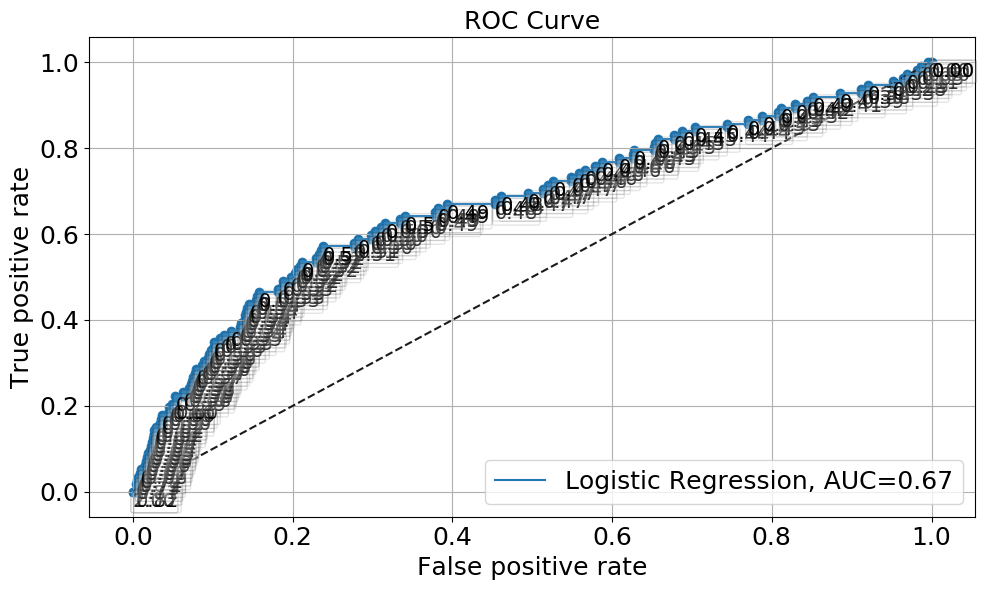

In [30]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_LR, X_test, y_test, "Logistic Regression", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [31]:
cv_LR = cross_val_score(clf_LR, X_rus, y_rus, cv=5, scoring="roc_auc")
print("AUC Logistic regresssion: %0.2f (+/- %0.2f)" % (cv_LR.mean(), cv_LR.std() * 2))

AUC Logistic regresssion: 0.67 (+/- 0.01)


In [ ]:
logreg = LogisticRegression(class_weight='balanced', max_iter = 600)
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,25,30],
         "penalty":['l2'], 'solver':['lbfgs', 'liblinear']}
clf_LR_opt = GridSearchCV(logreg,param,scoring= 'roc_auc',refit=True,cv=5)
clf_LR_opt.fit(X_rus,y_rus)
print('Best recall: {:.4}, with best C: {}'.format(clf_LR_opt.best_score_, clf_LR_opt.best_params_))

In [33]:
LR_predictions_opt = clf_LR_opt.predict(X_test)
print("Accuracy = {:.2f}".format(accuracy_score(y_test, LR_predictions_opt)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, LR_predictions_opt , target_names= class_names))
print(confusion_matrix(y_test, LR_predictions_opt))


NameError: name 'clf_LR_opt' is not defined

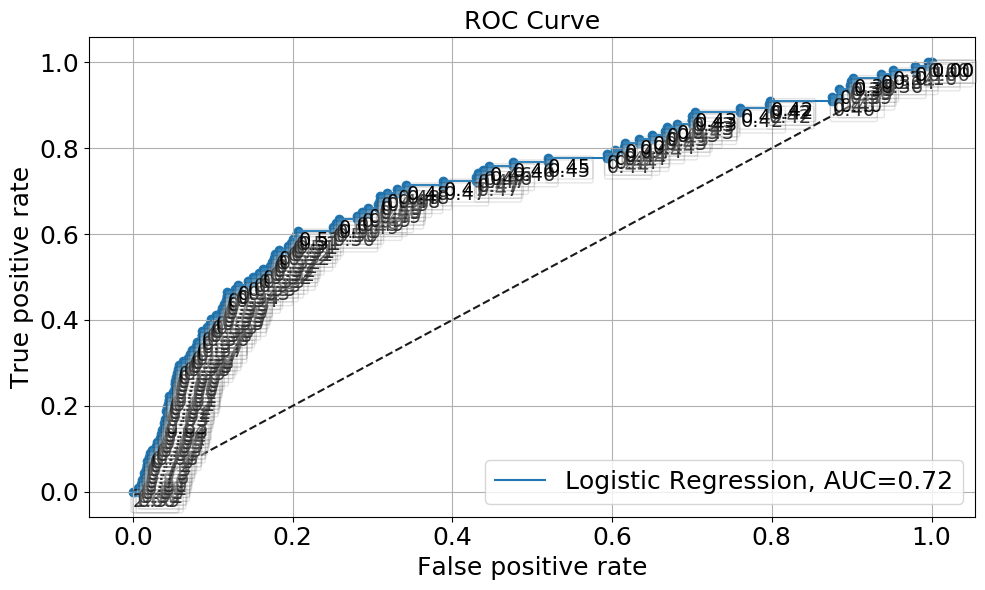

In [34]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_LR_opt, X_test, y_test, "Logistic Regression", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(X_rus, y_rus)
clf_GNB

GNB_predictions = clf_GNB.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, GNB_predictions)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, GNB_predictions , target_names= class_names))
print(confusion_matrix(y_test, GNB_predictions))

Accuracy = 0.08
              precision    recall  f1-score   support

 Not_Bakrupt       0.99      0.08      0.15     18431
    Bankrupt       0.01      0.93      0.01       112

    accuracy                           0.08     18543
   macro avg       0.50      0.50      0.08     18543
weighted avg       0.99      0.08      0.15     18543

[[ 1464 16967]
 [    8   104]]


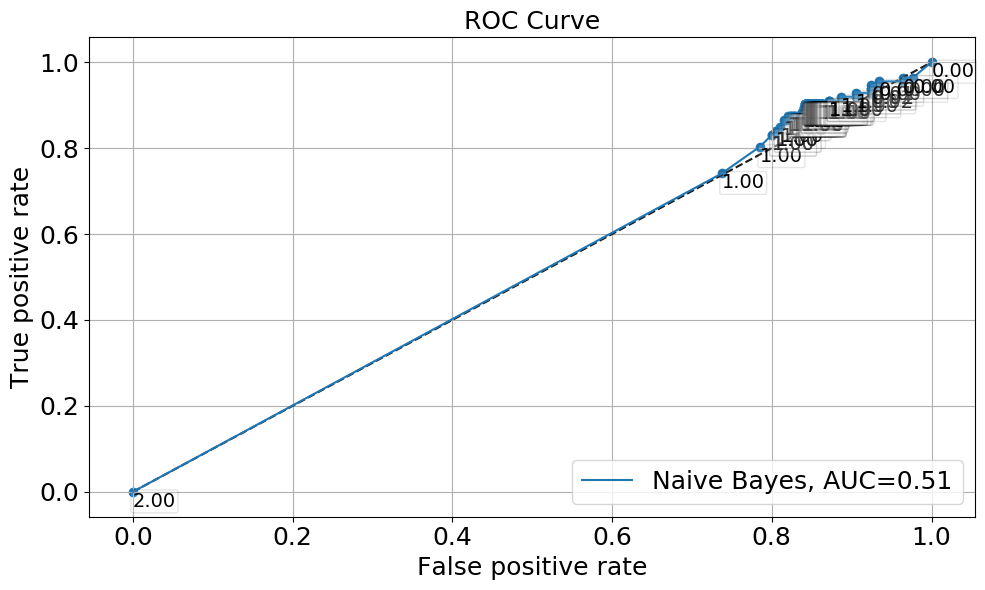

In [34]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_GNB, X_test, y_test, "Naive Bayes", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [35]:
cv_GBN = cross_val_score(clf_GNB, X_rus, y_rus, cv=10, scoring="roc_auc")
print("AUC Naive Bayes: %0.2f (+/- %0.2f)" % (cv_GBN.mean(), cv_LR.std() * 2))

AUC Naive Bayes: 0.56 (+/- 0.01)


In [39]:
parameters = {'var_smoothing':[0.001,.1,.2,.3,.5,.7,.8,.9]}


clf_GNB_opt = GridSearchCV(clf_GNB, parameters, scoring='roc_auc', cv=10, return_train_score=True)
%time clf_GNB_opt.fit(X_rus,y_rus)

clf_GNB_opt.best_params_
clf_GNB_opt.best_score_
clf_GNB_opt.best_estimator_

GNB_predictions_opt = clf_GNB_opt.predict(X_test)

Wall time: 991 ms


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.001, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8,
                                           0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'var_smoothing': 0.001}

0.722191230486685

GaussianNB(priors=None, var_smoothing=0.001)

In [40]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, GNB_predictions_opt)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, GNB_predictions_opt , target_names= class_names))
print(confusion_matrix(y_test, GNB_predictions_opt))

Accuracy = 0.06
              precision    recall  f1-score   support

 Not_Bakrupt       0.99      0.05      0.10     18431
    Bankrupt       0.01      0.96      0.01       112

    accuracy                           0.06     18543
   macro avg       0.50      0.50      0.05     18543
weighted avg       0.99      0.06      0.10     18543

[[  925 17506]
 [    5   107]]


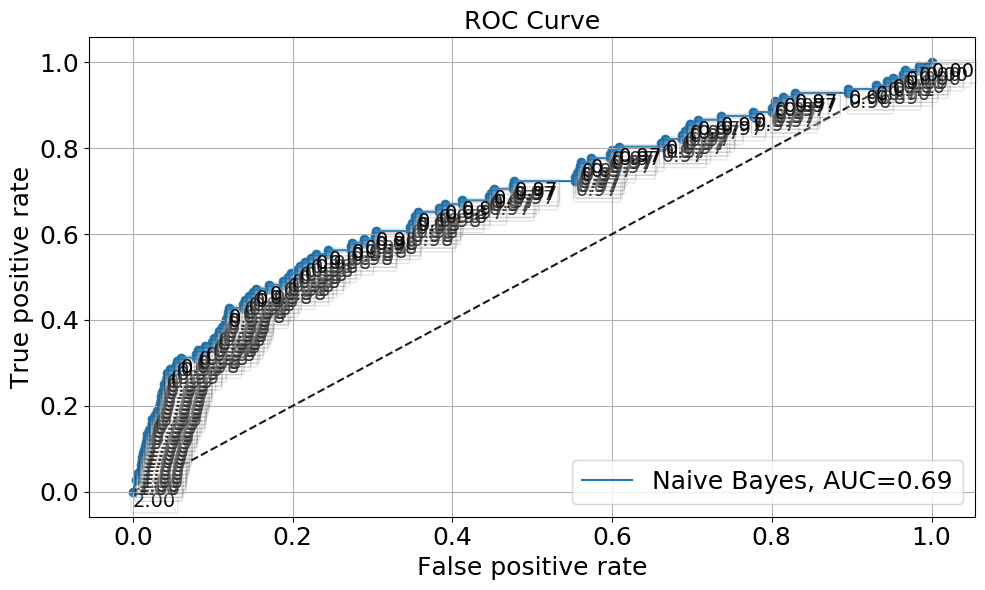

In [41]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_GNB_opt, X_test, y_test, "Naive Bayes", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(X_rus, y_rus)
RF_predictions = clf_RF.predict(X_test)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, RF_predictions)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, RF_predictions , target_names= class_names))
print(confusion_matrix(y_test, RF_predictions))

Accuracy = 0.98
              precision    recall  f1-score   support

 Not_Bakrupt       1.00      0.98      0.99     18431
    Bankrupt       0.14      0.40      0.21       112

    accuracy                           0.98     18543
   macro avg       0.57      0.69      0.60     18543
weighted avg       0.99      0.98      0.99     18543

[[18153   278]
 [   67    45]]


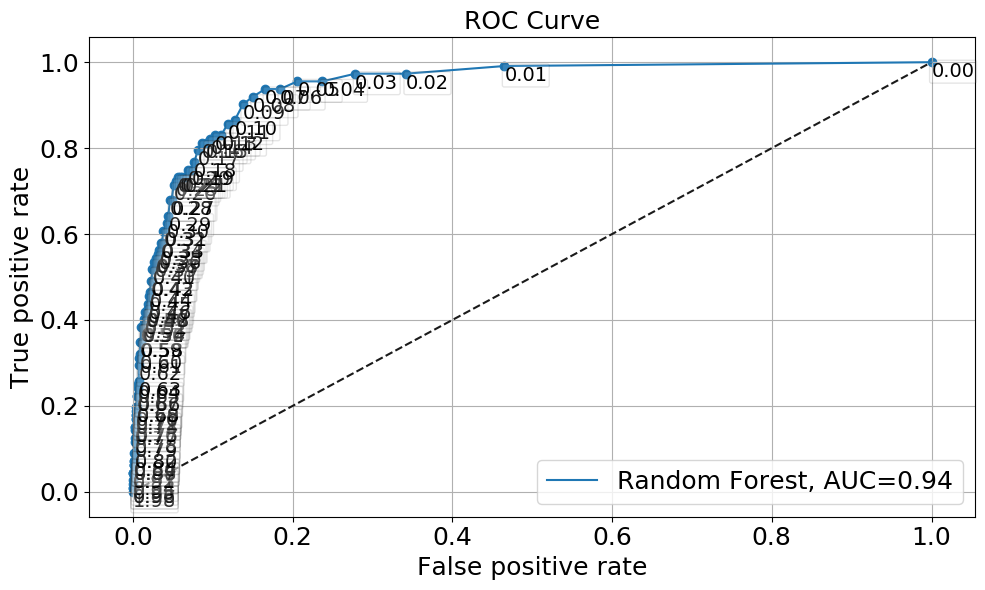

In [38]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_RF, X_test, y_test, "Random Forest", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [39]:
cv_RF = cross_val_score(clf_RF, X_rus, y_rus, cv=5, scoring="roc_auc")
print("AUC Random Forest: %0.2f (+/- %0.2f)" % (cv_RF.mean(), cv_RF.std() * 2))

AUC Random Forest: 1.00 (+/- 0.00)


In [46]:
## Grid Search for Random Forest
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}

clf_RF_opt = GridSearchCV(estimator = clf_RF, param_grid = param_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 2)

clf_RF_opt.fit(X_rus, y_rus)

clf_RF_opt.best_params_
clf_RF_opt.best_score_
clf_RF_opt.best_estimator_


#RF_predictions_opt = clf_RF_opt.predict(X_test)





Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

0.9283205747667305

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
RF_predictions_opt = clf_RF_opt.predict(X_test)
print("Accuracy = {:.2f}".format(accuracy_score(y_test, RF_predictions_opt)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, RF_predictions_opt , target_names= class_names))
print(confusion_matrix(y_test, RF_predictions_opt))

Accuracy = 0.84
              precision    recall  f1-score   support

 Not_Bakrupt       1.00      0.84      0.91     18431
    Bankrupt       0.03      0.89      0.06       112

    accuracy                           0.84     18543
   macro avg       0.52      0.87      0.49     18543
weighted avg       0.99      0.84      0.91     18543

[[15473  2958]
 [   12   100]]


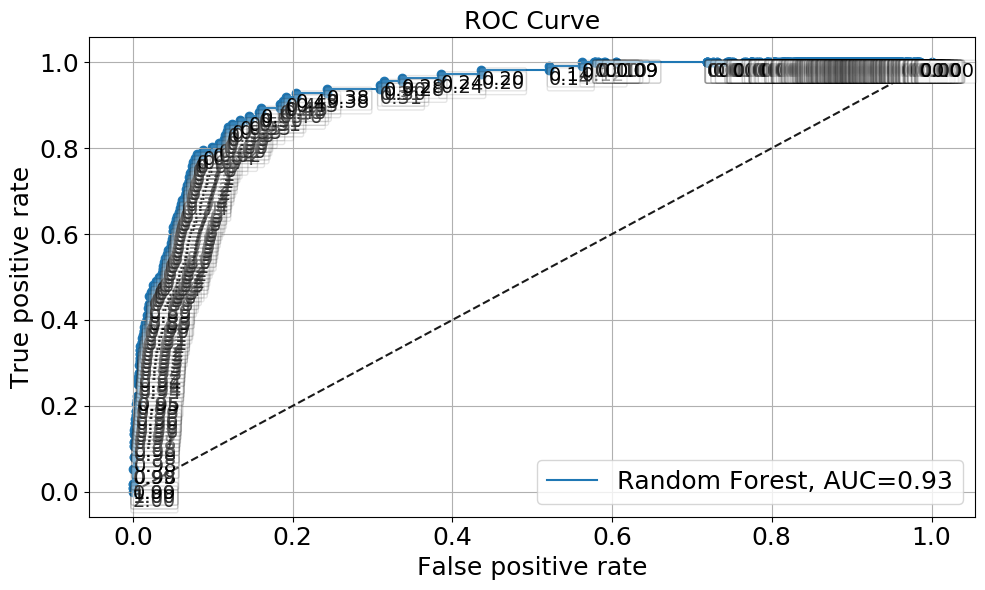

In [48]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_RF_opt, X_test, y_test, "Random Forest", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_RF_opt, random_state=1).fit(X_rus, y_rus)
eli5.show_weights(perm, feature_names = X_rus.columns.tolist())

C:\Users\SWETA_SOUMITRA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SWETA_SOUMITRA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0269 ± 0.0109,Return_on_Equity
0.0155 ± 0.0012,Market_Book_Ratio
0.0148 ± 0.0038,Operational_Margin
0.0096 ± 0.0012,Assets_Growth
0.0073 ± 0.0005,Liquidity
0.0066 ± 0.0007,Employee_Growth
0.0065 ± 0.0012,Asset_Turnover
0.0064 ± 0.0009,Sales_Growth
0.0054 ± 0.0011,EPS
0.0049 ± 0.0009,Leverage_Ratio


## SVM

In [ ]:
from sklearn.svm import SVC

clf_SVM = SVC(probability = True)
clf_SVM.fit(X_rus, y_rus)

SVM_predictions = clf_SVM.predict(X_test)

In [51]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, SVM_predictions)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, SVM_predictions , target_names= class_names))
print(confusion_matrix(y_test, SVM_predictions))

Accuracy = 0.72
              precision    recall  f1-score   support

 Not_Bakrupt       1.00      0.72      0.84     18431
    Bankrupt       0.01      0.47      0.02       112

    accuracy                           0.72     18543
   macro avg       0.50      0.60      0.43     18543
weighted avg       0.99      0.72      0.83     18543

[[13263  5168]
 [   59    53]]


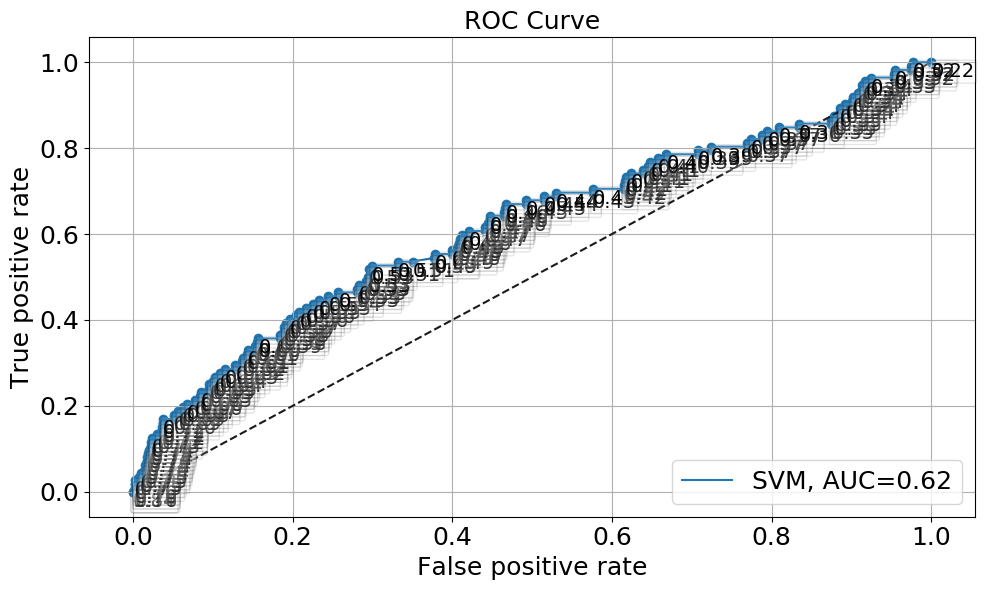

In [52]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_SVM, X_test, y_test, "SVM", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout()

In [53]:
cv_SVM = cross_val_score(clf_SVM, X_rus, y_rus, cv=10, scoring="roc_auc")
print("AUC SNM: %0.2f (+/- %0.2f)" % (cv_SVM.mean(), cv_SVM.std() * 2))

AUC SNM: 0.64 (+/- 0.19)


In [54]:
parameters = {'kernel':['linear','rbf'],'C':[0.0025, 0.025, 0.25, 0.5, 1, 10]}

clf_SVM_opt = GridSearchCV(clf_SVM, param_grid=parameters, cv=5, return_train_score=True)

%time clf_SVM_opt.fit(X_rus, y_rus)

clf_SVM_opt.best_params_
clf_SVM_opt.best_score_
clf_SVM_opt.best_estimator_


Wall time: 6.71 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0025, 0.025, 0.25, 0.5, 1, 10],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

{'C': 10, 'kernel': 'linear'}

0.6297340189170317

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
SVM_Predictions_opt = clf_SVM_opt.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, SVM_Predictions_opt)))
class_names = ['Not_Bakrupt','Bankrupt']
print(classification_report(y_test, SVM_Predictions_opt , target_names= class_names))
print(confusion_matrix(y_test, SVM_Predictions_opt))

Accuracy = 0.85
              precision    recall  f1-score   support

 Not_Bakrupt       1.00      0.85      0.92     18431
    Bankrupt       0.02      0.45      0.03       112

    accuracy                           0.85     18543
   macro avg       0.51      0.65      0.47     18543
weighted avg       0.99      0.85      0.91     18543

[[15621  2810]
 [   62    50]]


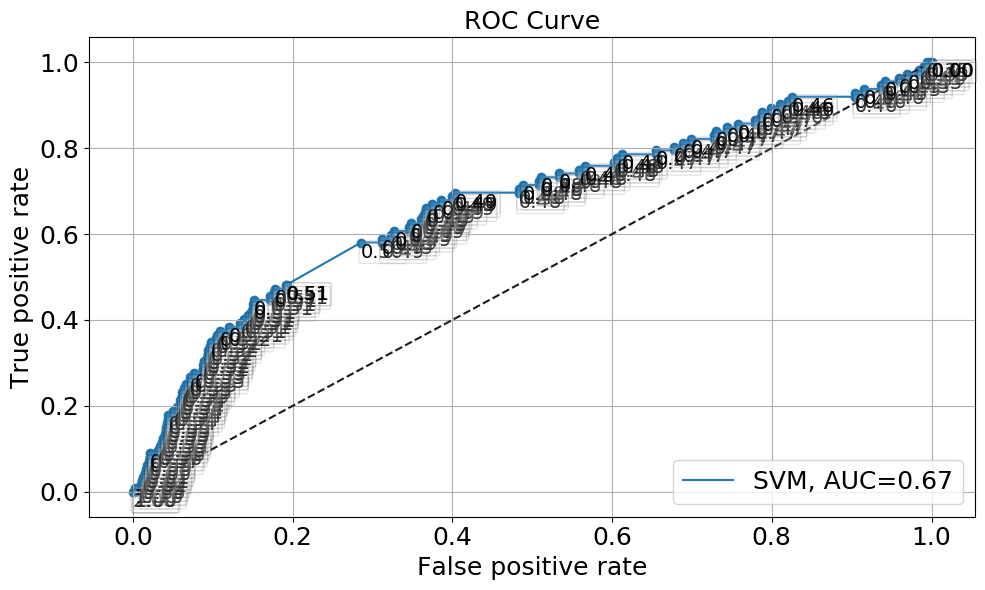

In [56]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf_SVM_opt, X_test, y_test, "SVM", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout()

In [57]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']